In [22]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
%matplotlib inline

from pathlib import Path

from attila.data.parse import parse_data, get_data
from attila.util.config import get_config
from attila.util.plots import plot_sample
from attila.experiments.data import load_experiments
from attila.experiments.do import do_batch_experiments
from attila.experiments.tools import create_tex_experiments

In [24]:
_here = Path('.').resolve()
config = get_config(_here / './config.ini')

data_path = _here / config.get('data', 'folder')
data_path = data_path.resolve()

out_path = Path(config.get('experiments', 'output folder')).resolve()
out_path.mkdir(parents=True, exist_ok=True)  # rm and mkdir if existing

images_path = data_path / config.get('data', 'images')
masks_path = data_path / config.get('data', 'masks')

In [20]:
raw = get_data(images_path, masks_path)
X, y = parse_data(
    raw,
    (config.getint('image', 'width'), config.getint('image', 'height'))
)

18

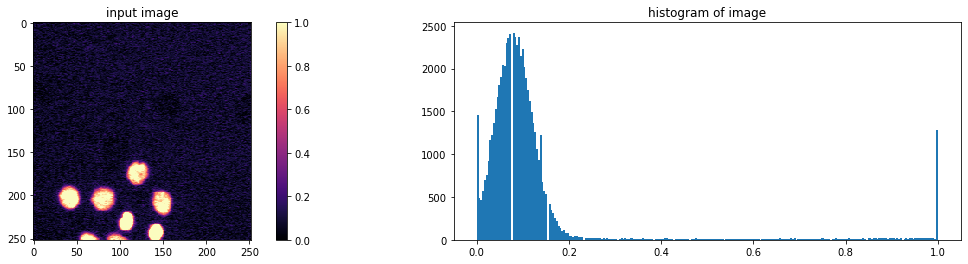

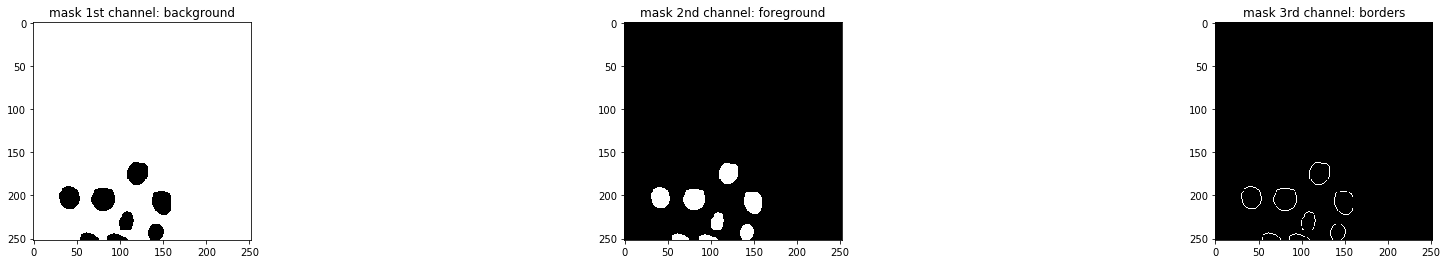

In [21]:
plot_sample(X, y)

In [27]:
experiments_file = _here / config.get('experiments', 'output file')
experiments = load_experiments(experiments_file)

In [23]:
do_batch_experiments(experiments, (X, y), config, out_path)

testing data: X ~ (28, 252, 252, 1), y ~ (28, 252, 252, 3)
ready to perform #1 / 2 batch of experiments
augmented training data: X ~ (216, 252, 252, 1), y ~ (216, 252, 252, 3)
ready to perform 2 experiments
=== experiment #1 / 2: wow
= dataset training: X ~ (216, 252, 252, 1), y ~ (216, 212, 212, 3)
= dataset validation: X ~ (10, 252, 252, 1), y ~ (10, 212, 212, 3)
= dataset test (not used): X ~ (28, 252, 252, 1), y ~ (28, 212, 212, 3)
=== model
= # layers: 53
= # total params: 1897987
= # trainable params: 1897987
= # non-trainable params: 0
Epoch 1/3
53/54 [============================>.] - ETA: 0s - loss: 0.1546 - accuracy: 0.9501 - batch_metric-mean_IoU: 0.4130 - batch_metric-mean_DSC: 0.3357
Epoch 00001: loss improved from inf to 0.15214, saving model to /home/h4/stfo194b/scratch/attila/out/run-0/wow/model.h5
54/54 [==============================] - 3s 60ms/step - loss: 0.1521 - accuracy: 0.9508 - batch_metric-mean_IoU: 0.4159 - batch_metric-mean_DSC: 0.3378 - val_loss: 0.0190 - v

54/54 [==============================] - 2s 45ms/step - loss: 0.0218 - accuracy: 0.9877 - batch_metric-mean_IoU: 0.5872 - batch_metric-mean_DSC: 0.4540 - val_loss: 0.0213 - val_accuracy: 0.9879 - val_batch_metric-mean_IoU: 0.6367 - val_batch_metric-mean_DSC: 0.4778 - lr: 0.0010
Epoch 3/3
53/54 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9916 - batch_metric-mean_IoU: 0.6503 - batch_metric-mean_DSC: 0.5009
Epoch 00003: loss improved from 0.02181 to 0.01571, saving model to /home/h4/stfo194b/scratch/attila/out/run-1/wow_1/model.h5
7/7 [==============================] - 0s 12ms/step
=== evaluation stats
= metrics on test set (size: 28)
= batch_metric-mean_IoU ~ mean 0.690 median 0.722 std 0.105
= batch_metric-mean_DSC ~ mean 0.527 median 0.555 std 0.088
done! output folder is /home/h4/stfo194b/scratch/attila/out/run-1


In [48]:
create_tex_experiments(config, out_path)

run #1: loaded 2 results from /home/stefano/scratch/attila/out/run-0/experiments.json
creating .tex table for 2 experiments configurations

wow & \cmark{} & \cmark{} & valid & 53 & 1897987 \\
wow_1 & \xmark{} & \xmark{} & same & 21 & 1697795 \\

creating .tex table for 2 experiments results

wow & \textbf{0.681} & \textbf{0.525} \\
wow_1 & 0.651 (-4.4 \%) & 0.507 (-3.4 \%) \\

run #2: loaded 2 results from /home/stefano/scratch/attila/out/run-1/experiments.json
creating .tex table for 2 experiments configurations

wow & \cmark{} & \cmark{} & valid & 53 & 1897987 \\
wow_1 & \xmark{} & \xmark{} & same & 21 & 1697795 \\

creating .tex table for 2 experiments results

wow & 0.642 (-7.0 \%) & 0.484 (-8.1 \%) \\
wow_1 & \textbf{0.690} & \textbf{0.527} \\

creating .tex table for 2 runs

wow & 0.662 (-1.3 \%) & 0.504 (-2.4 \%) \\
wow_1 & \textbf{0.671} & \textbf{0.517} \\
